# Floral Data Processing

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#Warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading Data**

In [2]:
#Loading in the data from the previous notebook
GDS = pd.read_csv('GDS')

In [3]:
GDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49376 entries, 0 to 49375
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order #              49376 non-null  object
 1   Transaction Type     49376 non-null  object
 2   Order Time           49376 non-null  object
 3   Order Date           49376 non-null  object
 4   Delivery Date        49355 non-null  object
 5   Sender               30039 non-null  object
 6   Recipient            23570 non-null  object
 7   Product Total        49369 non-null  object
 8   Delivery             49364 non-null  object
 9   Nontaxable Delivery  49364 non-null  object
 10  Wire Out Fee         49250 non-null  object
 11  Discount             49250 non-null  object
 12  Gift Cards           49250 non-null  object
 13  Tax                  49364 non-null  object
 14  Tips                 49250 non-null  object
 15  Grand Total          49376 non-null  object
 16  Paym

In [4]:
#Preview of data
GDS.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date,Sender,Recipient,Product Total,Delivery,Nontaxable Delivery,Wire Out Fee,Discount,Gift Cards,Tax,Tips,Grand Total,Payment Method,Order Type,Order Method
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",Candyce Williams Glaser,NaN,$815.00,$0.00,$0.00,$0.00,$0.00,$0.00,$79.46,$0.00,$894.46,Credit Card,Taken,Phone
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$249.90,$0.00,$0.00,$0.00,-$124.96,$0.00,$12.19,$0.00,$137.13,Credit Card,Taken,Walk-In
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$24.95,$0.00,$0.00,$0.00,$0.00,$0.00,$2.43,$0.00,$27.38,Credit Card,Taken,Walk-In
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",Tracie Hamilton,NaN,$635.00,$0.00,$0.00,$0.00,$0.00,$0.00,$61.91,$0.00,$696.91,Credit Card,Taken,Phone
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",Candyce Williams Glaser,Candyce Williams Glaser,$702.00,$0.00,$25.00,$0.00,$0.00,$0.00,$68.45,$0.00,$795.45,Credit Card,Delivery,Walk-In


# **Data Exploration**

In [5]:
#Print statement containing number of total missing values
print("There are", GDS.isna().sum().sum(), "missing values.")

There are 46154 missing values.


In [6]:
#Looking at missing calues for each column
GDS.isna().sum()

Order #                    0
Transaction Type           0
Order Time                 0
Order Date                 0
Delivery Date             21
Sender                 19337
Recipient              25806
Product Total              7
Delivery                  12
Nontaxable Delivery       12
Wire Out Fee             126
Discount                 126
Gift Cards               126
Tax                       12
Tips                     126
Grand Total                0
Payment Method             0
Order Type               317
Order Method             126
dtype: int64

In [7]:
#Looking at data types and null values
GDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49376 entries, 0 to 49375
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order #              49376 non-null  object
 1   Transaction Type     49376 non-null  object
 2   Order Time           49376 non-null  object
 3   Order Date           49376 non-null  object
 4   Delivery Date        49355 non-null  object
 5   Sender               30039 non-null  object
 6   Recipient            23570 non-null  object
 7   Product Total        49369 non-null  object
 8   Delivery             49364 non-null  object
 9   Nontaxable Delivery  49364 non-null  object
 10  Wire Out Fee         49250 non-null  object
 11  Discount             49250 non-null  object
 12  Gift Cards           49250 non-null  object
 13  Tax                  49364 non-null  object
 14  Tips                 49250 non-null  object
 15  Grand Total          49376 non-null  object
 16  Paym

# **Data Cleaning**

### **Dropping unnecessary columns**

In [8]:
#Dropping unecessarry columns
#These columns do not contribute any meaningful data to the insight I am after
columns_to_drop = ['Sender','Recipient']
df = GDS.drop(columns_to_drop, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49376 entries, 0 to 49375
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order #              49376 non-null  object
 1   Transaction Type     49376 non-null  object
 2   Order Time           49376 non-null  object
 3   Order Date           49376 non-null  object
 4   Delivery Date        49355 non-null  object
 5   Product Total        49369 non-null  object
 6   Delivery             49364 non-null  object
 7   Nontaxable Delivery  49364 non-null  object
 8   Wire Out Fee         49250 non-null  object
 9   Discount             49250 non-null  object
 10  Gift Cards           49250 non-null  object
 11  Tax                  49364 non-null  object
 12  Tips                 49250 non-null  object
 13  Grand Total          49376 non-null  object
 14  Payment Method       49376 non-null  object
 15  Order Type           49059 non-null  object
 16  Orde

### **Changing Data Types**

In [9]:
# Print Data Frame Before Conversion 
print("Before conversion:")
print(df.dtypes)
print(df)

Before conversion:
Order #                object
Transaction Type       object
Order Time             object
Order Date             object
Delivery Date          object
Product Total          object
Delivery               object
Nontaxable Delivery    object
Wire Out Fee           object
Discount               object
Gift Cards             object
Tax                    object
Tips                   object
Grand Total            object
Payment Method         object
Order Type             object
Order Method           object
dtype: object
         Order # Transaction Type      Order Time    Order Date Delivery Date  \
0      100017453             Sale  03:28:16PM Sat  Dec 29, 2018  Dec 29, 2018   
1      100017452             Sale  03:16:50PM Sat  Dec 29, 2018  Dec 29, 2018   
2      100017451             Sale  02:58:53PM Sat  Dec 29, 2018  Dec 29, 2018   
3      100017450             Sale  02:54:45PM Sat  Dec 29, 2018  Dec 29, 2018   
4      100017202             Sale  02:48:15PM Sat  D

In [10]:
# Define the desired data types for columns as a dictionary
column_dict = {
    'Product Total': float,
    'Nontaxable Delivery': float,
    'Wire Out Fee': float,
    'Gift Cards': float,
    'Discount' : float, 
    'Grand Total' : float, 
    'Tax' : float, 
    'Tips': float,
}
# Function to change data types of specific columns in the DataFrame
def change_column_datatype(dataframe, col_dict):
    for col_name, col_type in col_dict.items():
        if col_type == float:  # Check if the target type is float (numeric)
            dataframe[col_name] = dataframe[col_name].str.replace(r'[\$,()]', '', regex=True).astype(col_type)
        else:
            dataframe[col_name] = dataframe[col_name].astype(col_type)
    return dataframe
# Call the function to change data types 
df = change_column_datatype(df, column_dict)

In [11]:
# Print Data Frame After Conversion 
print("\nAfter conversion")
print(df.dtypes)
print(df)


After conversion
Order #                 object
Transaction Type        object
Order Time              object
Order Date              object
Delivery Date           object
Product Total          float64
Delivery                object
Nontaxable Delivery    float64
Wire Out Fee           float64
Discount               float64
Gift Cards             float64
Tax                    float64
Tips                   float64
Grand Total            float64
Payment Method          object
Order Type              object
Order Method            object
dtype: object
         Order # Transaction Type      Order Time    Order Date Delivery Date  \
0      100017453             Sale  03:28:16PM Sat  Dec 29, 2018  Dec 29, 2018   
1      100017452             Sale  03:16:50PM Sat  Dec 29, 2018  Dec 29, 2018   
2      100017451             Sale  02:58:53PM Sat  Dec 29, 2018  Dec 29, 2018   
3      100017450             Sale  02:54:45PM Sat  Dec 29, 2018  Dec 29, 2018   
4      100017202             Sale  0

### **Unique values**

In [12]:
# Check for unique values to make sure they all make sense
unique_counts = df.nunique()
print(unique_counts)

Order #                47794
Transaction Type           6
Order Time             42430
Order Date              1684
Delivery Date           1822
Product Total           4614
Delivery                   4
Nontaxable Delivery      418
Wire Out Fee              55
Discount                1839
Gift Cards                21
Tax                     3084
Tips                       4
Grand Total             8252
Payment Method            13
Order Type                 4
Order Method               5
dtype: int64


In [13]:
df.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date,Product Total,Delivery,Nontaxable Delivery,Wire Out Fee,Discount,Gift Cards,Tax,Tips,Grand Total,Payment Method,Order Type,Order Method
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",815.00,$0.00,0.0,0.0,0.00,0.0,79.46,0.0,894.46,Credit Card,Taken,Phone
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",249.90,$0.00,0.0,0.0,-124.96,0.0,12.19,0.0,137.13,Credit Card,Taken,Walk-In
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",24.95,$0.00,0.0,0.0,0.00,0.0,2.43,0.0,27.38,Credit Card,Taken,Walk-In
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",635.00,$0.00,0.0,0.0,0.00,0.0,61.91,0.0,696.91,Credit Card,Taken,Phone
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",702.00,$0.00,25.0,0.0,0.00,0.0,68.45,0.0,795.45,Credit Card,Delivery,Walk-In


### **Replace nans function**

- The dataset had missing values in every column, necessitating the use of imputation techniques to fill in these gaps and ensure sufficient data for accurate analysis. 
- Imputation involved systematically replacing the missing values in each column with estimated or substituted values using simple imputer, ultimately creating a complete dataset suitable for further analysis.

In [14]:
def replace_nan(df):
    # Find categorical and numerical columns
    categorical_cols = df.select_dtypes(include='object').columns
    numerical_cols = df.select_dtypes(include=np.number).columns
    date_cols = ['Order Time', 'Order Date', 'Delivery Date']
# Replace NaT values with NaN
    df = df.replace(pd.NaT, np.nan)

# Impute missing values with mode for categorical variables
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
# Replace missing values in date columns with most frequent date
    for col in date_cols:
        most_frequent_date = df[col].mode().values[0]
        df[col].fillna(most_frequent_date, inplace=True)
        # Impute missing values with median for numerical variables
        numerical_imputer = SimpleImputer(strategy='most_frequent')
    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

    return df

In [15]:
#Runing the function to transform the data
transformed_data =replace_nan(df)

In [16]:
#Making sure the data has been transformed
transformed_data

,Order #,Transaction Type,Order Time,Order Date,Delivery Date,Product Total,Delivery,Nontaxable Delivery,Wire Out Fee,Discount,Gift Cards,Tax,Tips,Grand Total,Payment Method,Order Type,Order Method
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",815.00,$0.00,0.00,0.0,0.00,0.0,79.46,0.0,894.46,Credit Card,Taken,Phone
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",249.90,$0.00,0.00,0.0,-124.96,0.0,12.19,0.0,137.13,Credit Card,Taken,Walk-In
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",24.95,$0.00,0.00,0.0,0.00,0.0,2.43,0.0,27.38,Credit Card,Taken,Walk-In
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",635.00,$0.00,0.00,0.0,0.00,0.0,61.91,0.0,696.91,Credit Card,Taken,Phone
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",702.00,$0.00,25.00,0.0,0.00,0.0,68.45,0.0,795.45,Credit Card,Delivery,Walk-In
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49371,100053354,Sale,08:59:44AM Tue,3-Jan-23,3-Jan-23,247.50,$0.00,17.95,0.0,0.00,0.0,0.00,0.0,265.45,Bloomnation,Delivery,Phone
49372,100053353,Sale,08:57:34AM Tue,3-Jan-23,3-Jan-23,78.00,$0.00,15.00,0.0,0.00,0.0,7.61,0.0,100.61,Credit Card,Delivery,Phone
49373,100053352,Sale,08:55:04AM Tue,3-Jan-23,3-Jan-23,48.95,$0.00,15.95,0.0,0.00,0.0,0.00,0.0,64.90,CFS,Delivery,Phone
49374,100053351,Sale,08:48:31AM Tue,3-Jan-23,3-Jan-23,48.95,$0.00,15.95,0.0,0.00,0.0,0.00,0.0,64.90,CFS,Delivery,Phone


# **Creating the pipeline**

In [17]:
#Validation Split
X= transformed_data.drop(columns = 'Product Total')
y = transformed_data['Product Total']

In [18]:
#Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
#Function for pipeline creation
def create_preprocessing_pipeline(X_train, numeric_cols, categorical_cols):

#Scaler
    scaler = StandardScaler()

# Numeric pipeline
    numeric_pipe = make_pipeline(scaler)
    numeric_pipe

#OneHotEncoder
    ohe =OneHotEncoder(handle_unknown='ignore', sparse=False)

# Create the numeric and categorical pipeline
    numeric_pipe = make_pipeline(scaler)
    categorical_pipe = make_pipeline(ohe)

# Create column selectors
    num_cols_idx = np.isin(X_train.columns, numeric_cols)
    cat_cols_idx = np.isin(X_train.columns, categorical_cols)
    
# Create tuples for preprocessing the categorical and numeric columns
    num_tuple = (numeric_pipe, num_cols_idx)
    cat_tuple = (categorical_pipe, cat_cols_idx)
    
# Create the Column Transformer
    preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

# Fit the transformer
    preprocessor.fit(X_train)
    
    return preprocessor

In [20]:
#Defining columns 
numeric_cols = ['Product Total', 'Grand Total']
categorical_cols = ['Transaction Type', 'Order Type']

In [21]:
#Preprocessor creation
preprocessor = create_preprocessing_pipeline(X_train, numeric_cols, categorical_cols)

In [22]:
#Transforming x-train
X_train_preprocessed = preprocessor.transform(X_train)

In [23]:
#simplifying transformed data name
cd = transformed_data

In [24]:
#This shows us that there are rows in the data that are not sales, so we want to delete them.
cd['Transaction Type'].value_counts()

Sale                     46068
House Account Payment     1783
Adjustment                 981
Refund                     418
proposal                   114
House Account Credit        12
Name: Transaction Type, dtype: int64

In [25]:
#Function to extract only sales 

def remove_adjustment_refund_rows(data):
    # Filter out rows with 'Adjustment' and 'Refund' transaction types
    filtered_data = cd[cd['Transaction Type'].isin(['Sale'])]
    
    return filtered_data

# Example usage:
filtered_data = remove_adjustment_refund_rows(transformed_data)
fd = filtered_data

In [26]:
#Checking there are only sales rows in the data
fd['Transaction Type'].value_counts()

Sale    46068
Name: Transaction Type, dtype: int64

# **Data Exploration**

This section looks into exploring irregularities within the data and how I assess them.

In [27]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46068 entries, 0 to 49375
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order #              46068 non-null  object 
 1   Transaction Type     46068 non-null  object 
 2   Order Time           46068 non-null  object 
 3   Order Date           46068 non-null  object 
 4   Delivery Date        46068 non-null  object 
 5   Product Total        46068 non-null  float64
 6   Delivery             46068 non-null  object 
 7   Nontaxable Delivery  46068 non-null  float64
 8   Wire Out Fee         46068 non-null  float64
 9   Discount             46068 non-null  float64
 10  Gift Cards           46068 non-null  float64
 11  Tax                  46068 non-null  float64
 12  Tips                 46068 non-null  float64
 13  Grand Total          46068 non-null  float64
 14  Payment Method       46068 non-null  object 
 15  Order Type           46068 non-null 

### **Payment Method**

In [28]:
fd['Payment Method'].value_counts()

Credit Card                           36040
Bloomnation                            6252
Cash                                   1942
CFS                                     919
FSN                                     251
Check / Money order                     249
BBROOKS                                 161
Donation                                145
External Processor (Not Floranext)       60
Write Off                                32
Gift Certificate                         16
Wire Service                              1
Name: Payment Method, dtype: int64

### **Order method, type & source** 

In [29]:
#Compare to order source to verify there are no duplicates 
fd['Order Method'].value_counts()

Phone                            23582
Walk-In                          21849
Subscription / Standing Order      320
Website                            281
Florist-to-Florist                  36
Name: Order Method, dtype: int64

In [30]:
# Identify what the difference is in these last three columns ^^^
fd['Order Type'].value_counts()

Delivery    19915
Taken       19686
Pickup       5240
Wire Out     1227
Name: Order Type, dtype: int64

### **Non-taxable Delivery Compaired to Delivery Zip/Street**

In [31]:
#Figure out what the amounts represent
fd['Nontaxable Delivery'].value_counts()

0.00     25013
12.00     6662
15.00     5074
17.95     2437
16.95     1094
         ...  
9.95         1
45.40        1
12.30        1
46.99        1
11.49        1
Name: Nontaxable Delivery, Length: 282, dtype: int64

### **Product Name**

In [32]:
#Identifying duplicates
duplicates = fd.duplicated(keep='first') 
num_duplicates = duplicates.sum()
print('Number of duplicate rows:', num_duplicates)

#Print the duplicated rows
duplicate_rows = fd[duplicates]
print('Duplicate rows:')
print(duplicate_rows)

#Drop the identified duplicate rows
fd = fd.drop_duplicates(keep='first')

Number of duplicate rows: 6
Duplicate rows:
         Order # Transaction Type      Order Time    Order Date Delivery Date  \
3917   100013681             Sale  01:54:08PM Fri  Jul 13, 2018  Jul 18, 2018   
15219  100019111             Sale  03:25:54PM Fri     15-Mar-19     15-Mar-19   
18752  100031715             Sale  02:50:07PM Mon      2-Nov-20      6-Nov-20   
39121  100048548             Sale  10:45:29AM Mon     25-Jul-22     26-Jul-22   
47587  100055178             Sale  12:52:04PM Fri     10-Mar-23     10-Mar-23   
47588  100055178             Sale  12:52:04PM Fri     10-Mar-23     10-Mar-23   

       Product Total Delivery  Nontaxable Delivery  Wire Out Fee  Discount  \
3917           41.00    $0.00                 5.00           0.0       0.0   
15219          50.75   $0.00                  0.00           0.0       0.0   
18752         250.00   $0.00                  8.98           0.0       0.0   
39121         615.98   $0.00                  8.98           0.0       0.0  

In [33]:
#Confiriming there are no duplicates remaining
duplicates = fd.duplicated(keep='first') 
num_duplicates = duplicates.sum()
print('Number of duplicate rows:', num_duplicates)
duplicate_rows = fd[duplicates]
print('Duplicate rows:')
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Order #, Transaction Type, Order Time, Order Date, Delivery Date, Product Total, Delivery, Nontaxable Delivery, Wire Out Fee, Discount, Gift Cards, Tax, Tips, Grand Total, Payment Method, Order Type, Order Method]
Index: []


In [34]:
#Looking at overview of data
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46062 entries, 0 to 49375
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order #              46062 non-null  object 
 1   Transaction Type     46062 non-null  object 
 2   Order Time           46062 non-null  object 
 3   Order Date           46062 non-null  object 
 4   Delivery Date        46062 non-null  object 
 5   Product Total        46062 non-null  float64
 6   Delivery             46062 non-null  object 
 7   Nontaxable Delivery  46062 non-null  float64
 8   Wire Out Fee         46062 non-null  float64
 9   Discount             46062 non-null  float64
 10  Gift Cards           46062 non-null  float64
 11  Tax                  46062 non-null  float64
 12  Tips                 46062 non-null  float64
 13  Grand Total          46062 non-null  float64
 14  Payment Method       46062 non-null  object 
 15  Order Type           46062 non-null 

# **Visualizations**

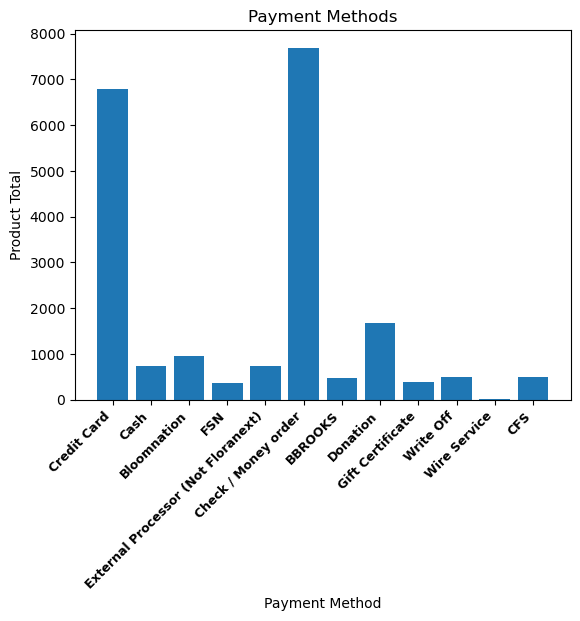

In [35]:
# Create barplot
plt.bar(fd['Payment Method'], fd['Product Total'])

# Set plot labels and title
plt.xlabel('Payment Method')
plt.ylabel('Product Total')
plt.xticks(rotation=45, fontsize = 9, fontweight = 'heavy', ha = 'right');
plt.title('Payment Methods')

# Show the plot
plt.show()

In [36]:
fd['Order Date'] = pd.to_datetime(fd['Order Date'])
fd['Year'] = fd['Order Date'].dt.year

In [37]:
product_total_by_year = fd.groupby('Year')['Product Total'].sum().reset_index()

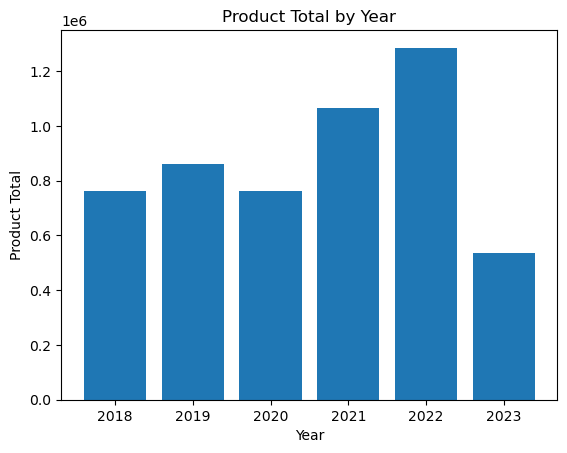

In [38]:
# Create barplot
plt.bar(product_total_by_year['Year'], product_total_by_year['Product Total'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Product Total')
plt.title('Product Total by Year')

# Show the plot
plt.show()

# **Delivery Date**

In [39]:
fd['Delivery Date'] = pd.to_datetime(fd['Delivery Date'])
fd['Year'] = fd['Delivery Date'].dt.year

In [40]:
filtered_data = fd[(fd['Year'] != 2016) & (fd['Year'] != 2017)]

In [41]:
product_total_by_year = filtered_data.groupby('Year')['Product Total'].sum().reset_index()

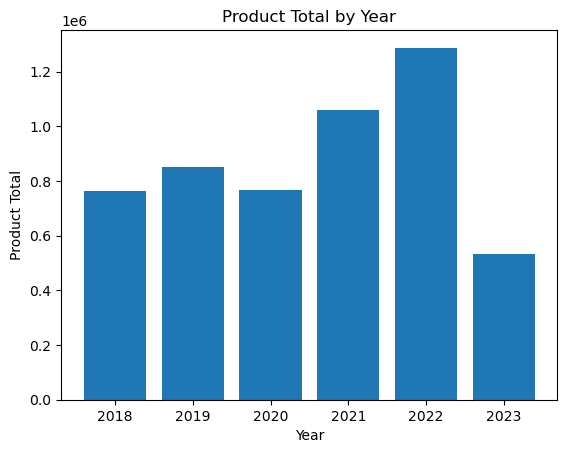

In [42]:
# Create barplot
plt.bar(product_total_by_year['Year'], product_total_by_year['Product Total'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Product Total')
plt.title('Product Total by Year')

# Show the plot
plt.show()

## **Product Total for Delivery Dates**

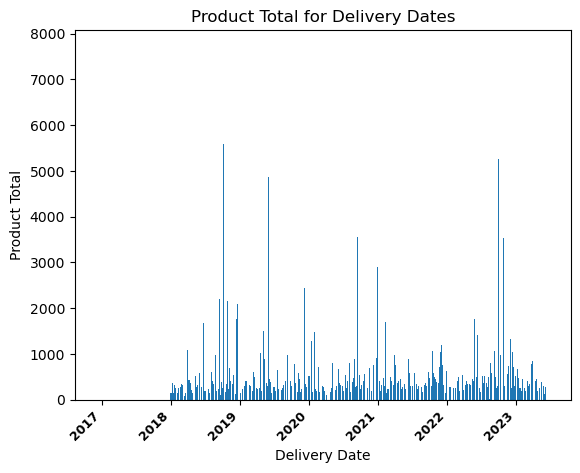

In [43]:
# Create barplot
plt.bar(fd['Delivery Date'], fd['Product Total'])

# Set plot labels and title
plt.xlabel('Delivery Date')
plt.ylabel('Product Total')
plt.xticks(rotation=45, fontsize = 9, fontweight = 'heavy', ha = 'right');
plt.title('Product Total for Delivery Dates')

# Show the plot
plt.show()

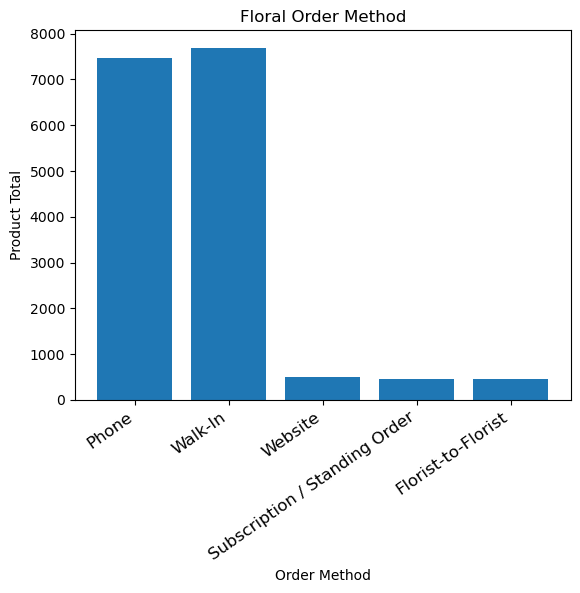

In [44]:
# Create barplot of order methods
plt.bar(fd['Order Method'], fd['Product Total'])

# Set plot labels and title
plt.xlabel('Order Method')
plt.ylabel('Product Total')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Floral Order Method')

# Show the plot
plt.show()

In [45]:
#Saving the new dataframe to upload in the next notebook
fd.to_csv('fd', index=False)